In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Data/Soil_data/2018_combined_sheets.csv')
df = df[df['Depth'] == '0-6"']
df.head()

,Lab ID,FieldID,Plot #,PlotID,Trt,Rate,Yield (bu/ac),Rel Yield,Distance,Depth,...,Ols Al,Ols As,Ols Ca,Ols Fe,Ols K,Ols Mg,Ols Mn,Ols P,Ols S,Ols Zn
2,340,16A,21A,21,Unfert,0.0,25.399129,54.155926,0-100,"0-6""",...,1.22,0.19,193.0,1.02,172.0,78.4,0.15,4.95,12.3,0.00
5,343,16A,21B,22,Unfert,0.0,23.816004,50.780393,600-700,"0-6""",...,1.14,0.28,115.0,1.28,266.0,33.1,0.09,4.86,13.8,0.01
8,334,16A,22A,19,High,33.8,36.939109,78.761426,0-100,"0-6""",...,1.63,0.28,164.0,1.52,171.0,64.3,0.17,6.18,14.5,0.00
11,337,16A,22B,20,Unfert,0.0,25.269542,53.879620,600-700,"0-6""",...,1.64,0.30,99.2,1.39,233.0,30.2,0.09,5.20,14.4,0.00
14,331,16A,23A,17,Unfert,0.0,26.695003,56.918983,0-100,"0-6""",...,1.90,0.39,150.0,2.95,196.0,62.0,1.00,6.75,13.5,0.29


In [5]:
df.columns.values

array(['Lab ID', 'FieldID', 'Plot #', 'PlotID', 'Trt', 'Rate',
       'Yield (bu/ac)', 'Rel Yield', 'Distance', 'Depth', 'Sample Date',
       'TOC', 'TC', 'IC', 'TN', 'DI Al', 'DI As', 'DI Ca', 'DI Fe',
       'DI K', 'DI Mg', 'DI Mn', 'DI P', 'DI S', 'DI Zn', 'DI NO3N',
       'DI SRP', 'DI NH4N ', 'H3A Al', 'H3A As', 'H3A Ca', 'H3A Fe',
       'H3A K', 'H3A Mg', 'H3A Mn', 'H3A P', 'H3A S', 'H3A Zn', 'H3A NO3',
       'H3A P color', 'H3A NH4N', 'M3 Al', 'M3 As', 'M3 Ca', 'M3 Fe',
       'M3 K', 'M3 Mg', 'M3 Mn', 'M3 P', 'M3 S', 'M3 Zn', 'Ols Al',
       'Ols As', 'Ols Ca', 'Ols Fe', 'Ols K', 'Ols Mg', 'Ols Mn', 'Ols P',
       'Ols S', 'Ols Zn'], dtype=object)

In [14]:
df_grouped = df[['FieldID','M3 P','Ols P','H3A P']].groupby('FieldID').mean()
df_grouped['Ols Rec'] = 48 - 2.5*df_grouped['Ols P']
o_threshold = 0
df_grouped['Ols Rec'] = np.where(df_grouped['Ols Rec'] > o_threshold, 'Yes', 'No')
m_threshold = 50
df_grouped['M3 Rec'] = np.where(df_grouped['M3 P'] < m_threshold, 'Yes', 'No')
df_grouped['H3A Rec'] = 0.5*160 - df_grouped['H3A P']
df_grouped['H3A Rec'] = np.where(df_grouped['H3A Rec'] > o_threshold, 'Yes', 'No')
df_grouped

,M3 P,Ols P,H3A P,Ols Rec,M3 Rec,H3A Rec
FieldID,,,,,,
16A,10.792727,4.272727,28.527045,Yes,Yes,Yes
6-12,11.039583,4.787083,1.789167,Yes,Yes,Yes
SW16,10.543889,3.777222,1.914444,Yes,Yes,Yes
Y10,157.713636,31.027273,98.036364,No,No,No
Y8,170.615625,53.831250,29.025000,No,No,Yes


In [20]:
actual_values = [1,0,0,0,0, 1,1,1,0,0, 1,1,1,1,0, 1,1,1,0,0]
m_pred =        [1,1,1,0,0, 1,1,1,0,0, 1,1,1,0,0, 1,1,1,0,0]
ols_pred =      [1,1,1,0,0, 1,1,1,0,0, 1,1,1,0,0, 1,1,1,0,0]
h_pred =        [1,1,1,0,1, 1,1,1,0,1, 1,1,1,0,1, 1,1,1,0,1]

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

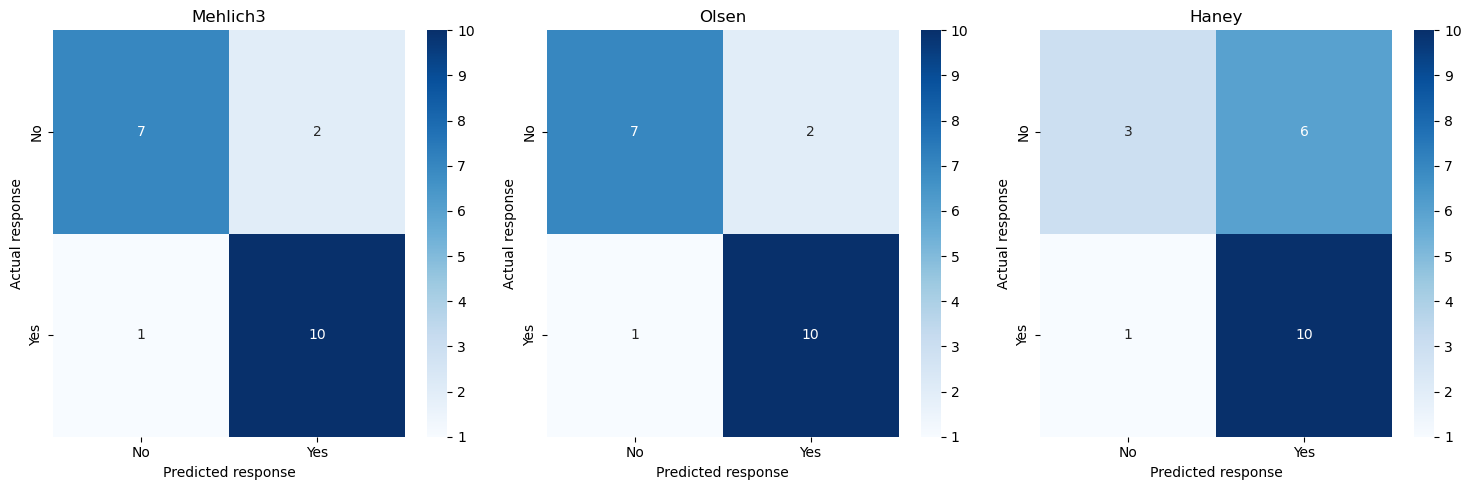

In [25]:
cm_test1 = confusion_matrix(actual_values, m_pred)
cm_test2 = confusion_matrix(actual_values, ols_pred)
cm_test3 = confusion_matrix(actual_values, h_pred)

cms = [cm_test1, cm_test2, cm_test3]
titles = ['Mehlich3', 'Olsen', 'Haney']

fig, axs = plt.subplots(1, 3, figsize = (15,5))

for i, ax in enumerate(axs.flat):
    sns.heatmap(cms[i], annot=True, fmt='d', cmap='Blues', ax=ax,
               xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'])
    ax.set_title(titles[i])
    ax.set_xlabel('Predicted response')
    ax.set_ylabel('Actual response')

plt.tight_layout()